# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January and June 2015. (use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc.)

In [2]:
data1 = pd.read_csv('201506-citibike-tripdata.csv')
data2 = pd.read_csv('201501-citibike-tripdata.csv')

In [3]:
data1.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1


In [4]:
data2.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1


In [5]:
frames = [data1, data2]
data = pd.concat(frames, ignore_index=True)
data.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1


In [6]:
data.tail(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1226769,725,1/31/2015 23:58,2/1/2015 0:10,435,W 21 St & 6 Ave,40.741740,-73.994156,368,Carmine St & 6 Ave,40.730386,-74.002150,21029,Subscriber,1957.0,1
1226770,892,1/31/2015 23:59,2/1/2015 0:14,504,1 Ave & E 15 St,40.732219,-73.981656,295,Pike St & E Broadway,40.714067,-73.992939,18342,Subscriber,1974.0,1


In [7]:
# df is the dataframe where the content of the csv file is stored

# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
#data.head()

In [8]:
data['Edate'] = pd.to_datetime(data['stoptime'])

In [9]:
data['Sdate'] = pd.to_datetime(data['starttime'])

In [10]:
data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'Edate', u'Sdate'],
      dtype='object')

# SPLIT BY CATEGORY


**H0: there is no statistical difference in the trip duration of bikers ride during the day and bikers ride during the night**

$$ \alpha = 0.05 $$

extracting the age happens in the cell below

# SPLIT BY CATEGORY


**H0: there is no statistical difference in age distribution of bikers for trips originating in Manhattan and in Brooklyn**

$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [35]:
#df is the dataframe where the content of the csv file is stored
data['daytime'] = data['tripduration'][(data['Sdate'].dt.hour>6) & (data['Sdate'].dt.hour<=18)]
data['nighttime'] = data['tripduration'][(data['Sdate'].dt.hour<=6)^(data['Sdate'].dt.hour>18)]

In [36]:
#dropping some data I no longer need
#... your code here...
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Edate,Sdate,daytime,nighttime
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:22:00,2015-06-01 00:00:00,NaN,1338.0
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:05:00,2015-06-01 00:00:00,NaN,290.0
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:11:00,2015-06-01 00:01:00,NaN,634.0
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:04:00,2015-06-01 00:01:00,NaN,159.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:22:00,2015-06-01 00:02:00,NaN,1233.0


In [37]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
data.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,daytime,nighttime
count,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.090751e+06,1.226771e+06,9.360560e+05,290715.000000
mean,8.463465e+02,4.561577e+02,4.073500e+01,-7.399105e+01,4.540858e+02,4.073470e+01,-7.399120e+01,1.816818e+04,1.975921e+03,1.084841e+00,8.555374e+02,816.753257
std,3.052017e+03,3.730900e+02,1.923260e-02,1.226162e-02,3.707375e+02,1.919737e-02,1.228086e-02,2.102264e+03,1.150760e+01,5.481352e-01,3.217187e+03,2445.320935
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00,6.000000e+01,60.000000
25%,3.810000e+02,3.070000e+02,4.072182e+01,-7.400004e+01,3.060000e+02,4.072165e+01,-7.400026e+01,1.636700e+04,1.968000e+03,1.000000e+00,3.850000e+02,368.000000
50%,6.050000e+02,4.170000e+02,4.073653e+01,-7.399076e+01,4.120000e+02,4.073650e+01,-7.399093e+01,1.815600e+04,1.978000e+03,1.000000e+00,6.100000e+02,588.000000
75%,9.920000e+02,4.920000e+02,4.075020e+01,-7.398195e+01,4.910000e+02,4.074972e+01,-7.398195e+01,1.993100e+04,1.985000e+03,1.000000e+00,1.000000e+03,965.000000
max,1.691873e+06,3.002000e+03,4.077152e+01,-7.395005e+01,3.002000e+03,4.077152e+01,-7.395005e+01,2.236400e+04,1.999000e+03,2.000000e+00,1.691873e+06,510246.000000


In [38]:
# dropping NaN values
data['daytime'].dropna(inplace= True)
data['nighttime'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

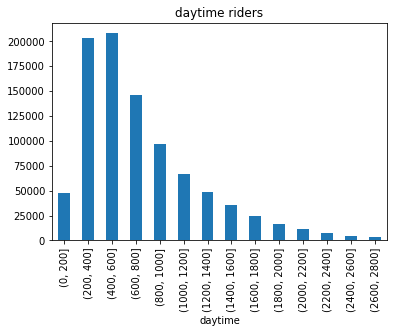

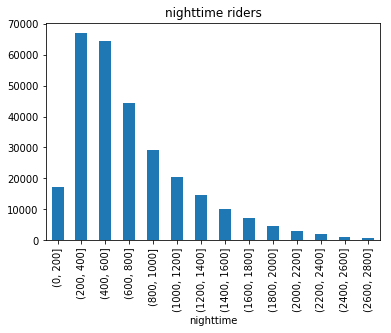

In [80]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!

bins = np.arange(0, 3000 , 200)
axD = data.daytime.groupby(pd.cut(data.daytime, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("daytime riders")
axN = data.nighttime.groupby(pd.cut(data.nighttime, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("nighttime riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [41]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [79]:
ks = scipy.stats.ks_2samp(data.daytime, data.nighttime)
print(ks)

Ks_2sampResult(statistic=0.022058808736930113, pvalue=3.1649694877346843e-94)


## ks statistic=0.02205 means that the max difference of Cumsum curve Daytime and Cumsum curve Nightime.
## pvalue=3.1649694877346843e-94 is less than 0.05, so we can reject the $H_0$.


**  FILL IN THE CELL BELOW!**

In [29]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [ ]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [30]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

In [65]:
len(data.nighttime)

290715

In [66]:
len(data.daytime)

936056

In [76]:
np.random.seed(100)
day = np.random.choice(data.daytime, len(data.nighttime), replace = True)

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [77]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
from scipy.stats.stats import pearsonr

ps = scipy.stats.pearsonr(day, data.nighttime)
ps


(-0.00080731416956420139, 0.66335499146454646)

### There are no strong correlation between daytime rider duration and nighttime rider duration as the Pearson correlation coefficient = 0.0008 shows.
### The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [78]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
sm = scipy.stats.spearmanr(day, data.nighttime)
sm


SpearmanrResult(correlation=-0.001239443172179044, pvalue=0.5039547053870812)

### The correlation value of -0.0012 is extremely close to zero. So this suggests weak relations by Spearman's coefficient. The p-value is not very meaningful here. Since the there is almost no relation between the two.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

## age of bikers for trips originating in Manhattan and in Brooklyn